# Importing required libraries

In [18]:
import pandas as pd
import datetime
import time
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  #Plots
from matplotlib import rcParams  #Size of plots  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading Sample Dataset


In [19]:

Jan_22_df = pd.read_parquet('Train/yellow_tripdata_2022-01.parquet')
Feb_22_df = pd.read_parquet('Train/yellow_tripdata_2022-02.parquet')
Mar_22_df = pd.read_parquet('Train/yellow_tripdata_2022-03.parquet')

Jan_22_df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00,3.80,1.00,N,142,236,1,14.50,3.00,0.50,3.65,0.00,0.30,21.95,2.50,0.00
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00,2.10,1.00,N,236,42,1,8.00,0.50,0.50,4.00,0.00,0.30,13.30,0.00,0.00
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.00,0.97,1.00,N,166,166,1,7.50,0.50,0.50,1.76,0.00,0.30,10.56,0.00,0.00
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00,1.09,1.00,N,114,68,2,8.00,0.50,0.50,0.00,0.00,0.30,11.80,2.50,0.00
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00,4.30,1.00,N,68,163,1,23.50,0.50,0.50,3.00,0.00,0.30,30.30,2.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,<NA>,90,170,0,8.00,0.00,0.50,2.39,0.00,0.30,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,<NA>,107,75,0,16.80,0.00,0.50,4.35,0.00,0.30,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,<NA>,113,246,0,11.22,0.00,0.50,2.00,0.00,0.30,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,<NA>,148,164,0,12.40,0.00,0.50,0.00,0.00,0.30,15.70,NaN,NaN


In [20]:
# Get the number of rows and columns in the dataframe
num_rows = Jan_22_df.shape[0]
num_cols = Jan_22_df.shape[1]

# Get the column names of the dataframe
column_names = Jan_22_df.columns.tolist()

# Get the data types of each column
data_types = Jan_22_df.dtypes

# Get the summary statistics of the dataframe
summary_stats = Jan_22_df.describe()

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
print("Column names:", column_names)
print("Data types:", data_types)




Number of rows: 2463931
Number of columns: 19
Column names: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
Data types: VendorID                           int64
tpep_pickup_datetime      datetime64[us]
tpep_dropoff_datetime     datetime64[us]
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
PULocationID                       int64
DOLocationID                       int64
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount               

In [21]:

pd.set_option('display.float_format', '{:,.2f}'.format)  # Display up to 2 decimal places
display(summary_stats)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,"2,463,931.00",2463931,2463931,"2,392,428.00","2,463,931.00","2,392,428.00","2,463,931.00","2,463,931.00","2,463,931.00","2,463,931.00","2,463,931.00","2,463,931.00","2,463,931.00","2,463,931.00","2,463,931.00","2,463,931.00","2,392,428.00","2,392,428.00"
min,1.00,1970-01-15 05:52:42.189000,1970-01-15 05:52:44.816000,0.00,0.00,1.00,1.00,1.00,0.00,-480.00,-4.50,-0.50,-125.22,-31.40,-0.30,-480.30,-2.50,-1.25
25%,1.00,1970-01-20 00:02:22.661000,1970-01-20 00:02:23.450500,1.00,1.04,1.00,132.00,113.00,1.00,6.50,0.00,0.50,0.72,0.00,0.30,11.30,2.50,0.00
50%,2.00,1970-01-20 00:13:41.505000,1970-01-20 00:13:42.229000,1.00,1.74,1.00,162.00,162.00,1.00,9.00,0.50,0.50,2.00,0.00,0.30,14.69,2.50,0.00
75%,2.00,1970-01-20 00:23:52.177500,1970-01-20 00:23:52.971000,1.00,3.13,1.00,234.00,236.00,1.00,14.00,2.50,0.50,3.00,0.00,0.30,20.02,2.50,0.00
max,6.00,1970-01-20 03:08:26.517000,1970-01-20 03:08:26.865000,9.00,"306,159.28",99.00,265.00,265.00,5.00,"401,092.32",33.50,16.59,888.88,193.30,0.30,"401,095.62",2.50,1.25
mean,1.71,<NA>,<NA>,1.39,5.37,1.42,166.08,163.58,1.19,12.95,1.01,0.49,2.39,0.37,0.30,19.17,2.28,0.08
std,0.50,<NA>,<NA>,0.98,547.87,5.92,65.47,70.79,0.50,255.81,1.24,0.08,2.83,1.68,0.04,255.96,0.74,0.31


# Data Preprocessing

In [22]:
# Converting Time stamps to UNIX time stamp format
# "YYYY-MM-DD HH:MM:SS" into unix time stamp

def convert_to_unix(s):
    s = str(s)
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%dT%H:%M:%S.%f").timetuple())

In [23]:
# we return a data frame which contains the columns
# 1.'passenger_count' : self explanatory
# 2.'trip_distance' : self explanatory
# 7.'total_amount' : total fair that was paid
# 8.'trip_times' : duration of each trip
# 9.'pickup_times : pickup time converted into unix time 
# 10.'Speed' : velocity of each trip


def return_with_trip_times(month):
    duration = month[['tpep_pickup_datetime','tpep_dropoff_datetime']]
    #pickups and dropoffs to unix time
    duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    duration_drop = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    #calculate duration of trips in minutes
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)

    #append durations of trips and speed in miles/hr to a new dataframe
    new_frame = month[['passenger_count','trip_distance','PULocationID','DOLocationID','total_amount']]
    
    new_frame['trip_times'] = durations
    new_frame['pickup_times'] = duration_pickup
    new_frame['Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_times'])
    
    return new_frame
  
	
frame_with_durations = return_with_trip_times(Jan_22_df)

## Outlier detection

### Outliers in trip duration

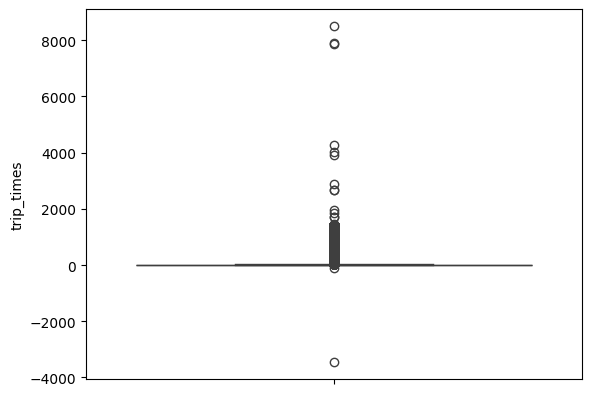

In [24]:
# the skewed box plot shows us the presence of outliers 
sns.boxplot(y="trip_times", data =frame_with_durations)
plt.show()

In [25]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -3442.4
10 percentile value is 4.016666666666667
20 percentile value is 5.6
30 percentile value is 7.033333333333333
40 percentile value is 8.533333333333333
50 percentile value is 10.183333333333334
60 percentile value is 12.116666666666667
70 percentile value is 14.6
80 percentile value is 18.1
90 percentile value is 24.633333333333333
100 percentile value is  8513.183333333332


In [26]:
#looking further from the 99th percecntile
for i in range(90,100):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 24.633333333333333
91 percentile value is 25.7
92 percentile value is 26.916666666666668
93 percentile value is 28.3
94 percentile value is 29.966666666666665
95 percentile value is 31.933333333333334
96 percentile value is 34.36666666666667
97 percentile value is 37.53333333333333
98 percentile value is 42.15
99 percentile value is 50.85
100 percentile value is  8513.183333333332


In [27]:
#looking further between the 99th and 100th percentile
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 50.85
99.1 percentile value is 52.3
99.2 percentile value is 54.06666666666667
99.3 percentile value is 56.166666666666664
99.4 percentile value is 58.75
99.5 percentile value is 60.06666666666667
99.6 percentile value is 62.18333333333333
99.7 percentile value is 67.35
99.8 percentile value is 77.68333333333334
99.9 percentile value is 837.2666666666667
100 percentile value is  8513.183333333332


In [37]:
# filtered DataFrame with trip times between 1 and 800 minutes
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_times>1) & (frame_with_durations.trip_times<800)]

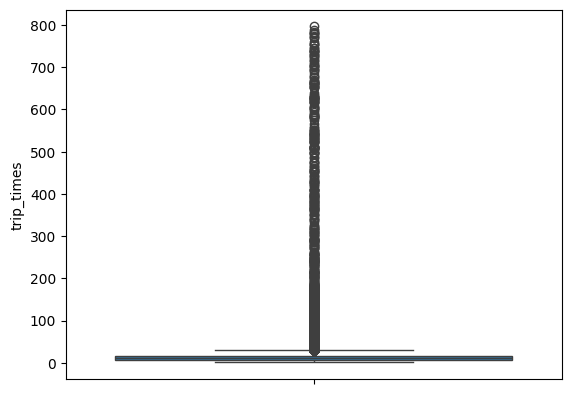

In [38]:
#box-plot after removal of outliers

sns.boxplot(y="trip_times", data =frame_with_durations_modified)
plt.show()

### Outliers in Speed

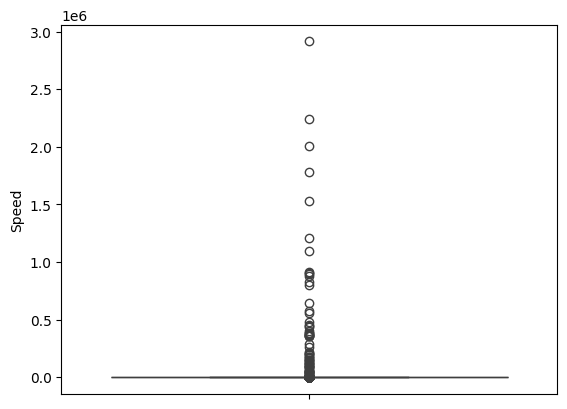

In [30]:
# check for any outliers in the data after trip duration outliers removed
# box-plot for speeds with outliers
frame_with_durations_modified['Speed'] = 60*(frame_with_durations_modified['trip_distance']/frame_with_durations_modified['trip_times'])
sns.boxplot(y="Speed", data =frame_with_durations_modified)
plt.show()

In [31]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 21.50352609308886
91 percentile value is 22.49040511727079
92 percentile value is 23.5741127348643
93 percentile value is 24.802488335925347
94 percentile value is 26.203753351206434
95 percentile value is 27.83748361730013
96 percentile value is 29.711392405063293
97 percentile value is 31.92811839323467
98 percentile value is 34.69879518072289
99 percentile value is 38.5875641756988
100 percentile value is  2914845.6


In [32]:
#looking further between the 99th and 100th percentile
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 38.5875641756988
99.1 percentile value is 39.10614525139665
99.2 percentile value is 39.6734693877551
99.3 percentile value is 40.27194066749074
99.4 percentile value is 40.96335078534031
99.5 percentile value is 41.72228989037759
99.6 percentile value is 42.639839034205224
99.7 percentile value is 43.82761998041136
99.8 percentile value is 45.44606413994169
99.9 percentile value is 48.322489391796324
100 percentile value is  2914845.6


In [33]:
# filtered DataFrame with speeds between 0 and 48.32 miles/hr
frame_with_durations_modified=frame_with_durations_modified[(frame_with_durations_modified.Speed>0) & (frame_with_durations_modified.Speed<48.32)]

### Outliers in Trip Distance

In [34]:
#looking further between the 99th and 100th percentile
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 19.6
99.1 percentile value is 19.8
99.2 percentile value is 20.04
99.3 percentile value is 20.31
99.4 percentile value is 20.6
99.5 percentile value is 20.95
99.6 percentile value is 21.37
99.7 percentile value is 21.98
99.8 percentile value is 23.1
99.9 percentile value is 26.41
100 percentile value is  164.81


In [35]:
# filtered DataFrame with trip distance between 0 and 26.4 miles
frame_with_durations_modified=frame_with_durations_modified[(frame_with_durations_modified.trip_distance>0) & (frame_with_durations_modified.trip_distance<26.4)]

### Outliers in Total Fare

In [36]:
#calculating total fare amount values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 75.7
99.1 percentile value is 75.72
99.2 percentile value is 75.72
99.3 percentile value is 77.1
99.4 percentile value is 78.4
99.5 percentile value is 79.35
99.6 percentile value is 80.87
99.7 percentile value is 81.85
99.8 percentile value is 86.21
99.9 percentile value is 97.68
100 percentile value is  401095.62
